In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from subprocess import check_output
print(check_output(["ls", "../Survey_Analysis"]).decode("utf8"))

CleanSurvey.csv
Survey.csv
Survey_v1.ipynb
Survey_v2.ipynb
Survey_v3.ipynb
Survey_v4.ipynb
Survey_v5.ipynb
data.py
data.pyc
negative-words.txt
positive-words.txt
prepros.py
prepros.pyc



In [2]:
df=pd.read_csv("../Survey_Analysis/Survey.csv")

In [3]:
df.head()

,Time Started,Date Submitted,Status,How often do you use Jupyter Notebook?,"What, if anything, hinders you from making Jupyter Notebook an even more regular part of your workflow?",Roughly how long have you been using Jupyter Notebook?,"Tool / Application #1:What tools and applications, if any, would you like to see more tightly integrated with Jupyter Notebook?","Tool / Application #2:What tools and applications, if any, would you like to see more tightly integrated with Jupyter Notebook?","Tool / Application #3:What tools and applications, if any, would you like to see more tightly integrated with Jupyter Notebook?",How do you run the Jupyter Notebook?,...,"Enhancement #2:Thinking back to when you first started using Jupyter Notebook, what enhancements would have made your initial experience better?","Enhancement #3:Thinking back to when you first started using Jupyter Notebook, what enhancements would have made your initial experience better?",Select all the words that best describe Jupyter Notebook.,Other word(s)::Select all the words that best describe Jupyter Notebook.,"What is your primary role when using Jupyter Notebook (e.g., student, astrophysicist, financial modeler, business manager, etc.)?",How many years have you been in this role?,"Industry #1:What industries does your role and analytical work support (e.g., Journalism, IT, etc.)?","Industry #2:What industries does your role and analytical work support (e.g., Journalism, IT, etc.)?","Industry #3:What industries does your role and analytical work support (e.g., Journalism, IT, etc.)?","How many people typically see and/or interact with the results of your work in Jupyter Notebook? (Consider people who view your notebooks on nbviewer, colleagues who rerun your notebooks, developers who star your notebook repos on GitHub, audiences who see your notebooks as slideshows, etc.)"
0,2015-12-21 22:21:47,2015-12-21 22:21:51,Partial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-12-22 00:03:36,2015-12-22 00:26:01,Complete,Daily,Ways to hide helper function definitions (or e...,Less than one year,sqlalchemy,bokeh (or other JS/interactive plotting packages),diff tool for changes in src (primarily for gi...,As a standalone application,...,easier callbacks with ipywidgets / ways to get...,NaN,comfortable;intuitive;quick,NaN,grad student (computational astrophysics),1 year,academic science,NaN,NaN,Tens
2,2015-12-22 00:17:49,2015-12-22 00:17:49,Partial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-12-22 00:22:07,2015-12-22 00:24:02,Partial,Daily,NaN,One year or more,version control on notebooks (git),publishing dashboards,dockerised kernels,Through Jupyter Hub,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-12-22 00:41:40,2015-12-22 00:42:09,Partial,Weekly,NaN,One year or more,NaN,NaN,NaN,As a standalone application,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_s = df.copy()

In [5]:
df_s = df_s.rename(columns = {'What, if anything, hinders you from making Jupyter Notebook an even more regular part of your workflow?':
                              'Constrains'})

In [6]:
df_s.head()

,Time Started,Date Submitted,Status,How often do you use Jupyter Notebook?,Constrains,Roughly how long have you been using Jupyter Notebook?,"Tool / Application #1:What tools and applications, if any, would you like to see more tightly integrated with Jupyter Notebook?","Tool / Application #2:What tools and applications, if any, would you like to see more tightly integrated with Jupyter Notebook?","Tool / Application #3:What tools and applications, if any, would you like to see more tightly integrated with Jupyter Notebook?",How do you run the Jupyter Notebook?,...,"Enhancement #2:Thinking back to when you first started using Jupyter Notebook, what enhancements would have made your initial experience better?","Enhancement #3:Thinking back to when you first started using Jupyter Notebook, what enhancements would have made your initial experience better?",Select all the words that best describe Jupyter Notebook.,Other word(s)::Select all the words that best describe Jupyter Notebook.,"What is your primary role when using Jupyter Notebook (e.g., student, astrophysicist, financial modeler, business manager, etc.)?",How many years have you been in this role?,"Industry #1:What industries does your role and analytical work support (e.g., Journalism, IT, etc.)?","Industry #2:What industries does your role and analytical work support (e.g., Journalism, IT, etc.)?","Industry #3:What industries does your role and analytical work support (e.g., Journalism, IT, etc.)?","How many people typically see and/or interact with the results of your work in Jupyter Notebook? (Consider people who view your notebooks on nbviewer, colleagues who rerun your notebooks, developers who star your notebook repos on GitHub, audiences who see your notebooks as slideshows, etc.)"
0,2015-12-21 22:21:47,2015-12-21 22:21:51,Partial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-12-22 00:03:36,2015-12-22 00:26:01,Complete,Daily,Ways to hide helper function definitions (or e...,Less than one year,sqlalchemy,bokeh (or other JS/interactive plotting packages),diff tool for changes in src (primarily for gi...,As a standalone application,...,easier callbacks with ipywidgets / ways to get...,NaN,comfortable;intuitive;quick,NaN,grad student (computational astrophysics),1 year,academic science,NaN,NaN,Tens
2,2015-12-22 00:17:49,2015-12-22 00:17:49,Partial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-12-22 00:22:07,2015-12-22 00:24:02,Partial,Daily,NaN,One year or more,version control on notebooks (git),publishing dashboards,dockerised kernels,Through Jupyter Hub,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-12-22 00:41:40,2015-12-22 00:42:09,Partial,Weekly,NaN,One year or more,NaN,NaN,NaN,As a standalone application,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
null_list = ['nothing', 'Nothing!', 'Nothing',
             'n/a', 'Nothing.', 'N/A', 'None',
             'none','No further need', 'hh',
             'Nothing so far!','nothing I can think of',' ']

for phrase in null_list:
    df_s.Constrains.replace(phrase, ' ', inplace=True)


In [8]:
df_s.Constrains.str.lower()

0                                                     NaN
1       ways to hide helper function definitions (or e...
2                                                     NaN
3                                                     NaN
4                                                     NaN
5                                                lazyness
6       having to setup a jupyter server in a particul...
7       - a standard option of converting the notebook...
8       mainly two missing features: 1. collapsable se...
9       maybe figure out how to schedule automated exe...
10         don't use it to teach all of my courses (yet).
11      browser becomes unresponsive when i start a to...
12                                real time collaboration
13      my coworkers do not use them. keybindings clas...
14                                        git integration
15      corporate it policy colleagues' lack of knowle...
16      it is very easy to do exploratory computing, b...
17            

In [9]:
df_s.Constrains.str.strip()

0                                                     NaN
1       Ways to hide helper function definitions (or e...
2                                                     NaN
3                                                     NaN
4                                                     NaN
5                                                lazyness
6       Having to setup a Jupyter server in a particul...
7       - a standard option of converting the notebook...
8       Mainly two missing features: 1. Collapsable se...
9       Maybe figure out how to schedule automated exe...
10         Don't use it to teach all of my courses (yet).
11      Browser becomes unresponsive when I start a to...
12                                real time collaboration
13      My coworkers do not use them. Keybindings clas...
14                                        git integration
15      Corporate IT policy Colleagues' lack of knowle...
16      It is very easy to do exploratory computing, b...
17            

In [10]:
df_s.to_csv('CleanSurvey.csv', encoding='utf-8')

In [11]:
from nltk.stem.wordnet import WordNetLemmatizer

# define the lemmatizer
lmtzr = WordNetLemmatizer()

# read the positive and negative lexicon in lists of words
positive_words = [lmtzr.lemmatize(line.strip().decode('utf-8')) for line in open('positive-words.txt')]
negative_words = [lmtzr.lemmatize(line.strip().decode('utf-8')) for line in open('negative-words.txt')]

print "We have {:d} positive words and {:d} negative words.".format(len(positive_words), len(negative_words))

We have 2006 positive words and 4783 negative words.


In [12]:
import nltk
import re

for words in df_s.Constrains:
    # tokenize and lemmatize the current survey
    line = re.sub(r'[^\w]', ' ', str(words))
    tokens = nltk.word_tokenize(line.decode('utf-8'))
    survey = [lmtzr.lemmatize(x.lower()) for x in tokens if len(x) >= 3]
    
    # print the survey
    print survey

[u'nan']
[u'way', u'hide', u'helper', u'function', u'definition', u'easier', u'way', u'import', u'function', u'from', u'notebook', u'but', u'those', u'might', u'bad', u'practice']
[u'nan']
[u'nan']
[u'nan']
[u'lazyness']
[u'having', u'setup', u'jupyter', u'server', u'particular', u'folder', u'location', u'before', u'opening', u'file', u'and', u'then', u'only', u'having', u'access', u'file', u'beneath', u'that', u'folder', u'wish', u'could', u'navigate', u'computer', u'just', u'with', u'file', u'explorer', u'with', u'search', u'and', u'preview', u'option']
[u'standard', u'option', u'converting', u'the', u'notebook', u'html', u'pdf', u'with', u'without', u'code', u'cell', u'input', u'output', u'prompt', u'easy', u'integration', u'static', u'website', u'sphinx', u'where', u'that', u'static', u'website', u'used', u'sort', u'reporting', u'tool', u'when', u'converting', u'certain', u'format', u'rst', u'the', u'rendering', u'the', u'output', u'panda', u'dataframes', u'also', u'that', u'format

In [13]:
import nltk
import re

# define the function that computes the sentiment score
def get_sentiment_score(text):
    # tokenize and lemmatize the current survey
    line = re.sub(r'[^\w]', ' ', str(words))
    tokens = nltk.word_tokenize(line.decode('utf-8'))
    survey = [lmtzr.lemmatize(x.lower()) for x in tokens if len(x) >= 3]

    # calculate the sentiment score
    score = 0
    for word in survey:
        if word in positive_words:
            score = score + 1
            print "+1", word
        if word in negative_words:
            score = score - 1
            print "-1", word
    
    return score

# apply it on our survey csv
for words in df_s.Constrains:
    print "Constrains: '{:s}', score: {:d}".format(str(words), get_sentiment_score(words))
    print "------------------------------------"

Constrains: 'nan', score: 0
------------------------------------
+1 easier
-1 bad
Constrains: 'Ways to hide helper function definitions (or easier ways to import functions from notebooks). But those might be bad practices', score: 0
------------------------------------
Constrains: 'nan', score: 0
------------------------------------
Constrains: 'nan', score: 0
------------------------------------
Constrains: 'nan', score: 0
------------------------------------
Constrains: 'lazyness', score: 0
------------------------------------
Constrains: 'Having to setup a Jupyter server in a particular folder location before opening up a file (and then only having access to files beneath that folder). I wish I could navigate my computer just as I do with a File explorer, with search and preview options.   ', score: 0
------------------------------------
+1 prompt
+1 easy
-1 static
-1 static
Constrains: '- a standard option of converting the notebook to html, pdf,... with or without code cells, inpu

In [14]:
# define the function that computes the sentiment score
def get_sentiment_score(text):
    # tokenize and lemmatize the current tweet
    line = re.sub(r'[^\w]', ' ', str(words))
    tokens = nltk.word_tokenize(line.decode('utf-8'))
    survey = iter([lmtzr.lemmatize(x.lower()) for x in tokens if len(x) >= 3])

    # calculate the sentiment score
    score = 0
    while True:
        try:
        # get the next item
            word = next(survey)
            if word =='not':
                if survey.next() in positive_words:
                     score = score - 1
                if survey.next() in negative_words:
                     score = score + 1
            else:
                if word in positive_words:
                     score = score + 1
                if word in negative_words:
                    score = score - 1              
        except StopIteration:
        # if StopIteration is raised, break from loop
            break
    return score

In [15]:
positive_surveys = []
negative_surveys = []
neutral_surveys = []
pos_scores = []
neg_scores = []
neu_scores = []

# apply it on our survey csv
for words in df_s.Constrains:
    scores = get_sentiment_score(words)
    if scores > 0:
        positive_surveys.append(words)
        pos_scores.append(scores)    
   
    if scores < 0:
        negative_surveys.append(words)
        neg_scores.append(scores) 
        
    if scores == 0:
        neutral_surveys.append(words)
        neu_scores.append(scores) 

# 10 most positive surveys
sorted_pos_surveys = sorted(zip(pos_scores, positive_surveys), reverse=True)[:10]
print "10 most positive surveys:"
for top_surveys in sorted_pos_surveys:
    print top_surveys[1]

print "-------------------------------------------------------------------------"

# 10 most negative surveys
sorted_neg_surveys = sorted(zip(neg_scores, negative_surveys), reverse=True)[-10:]
print "10 most negative surveys:"
for top_surveys in sorted_neg_surveys:
    print top_surveys[1]
    

10 most positive surveys:
- full(er) latex support including cross references for figs, eqns, etc.  - a pure text format for version control / diffs and to allow working from text editor (I strongly dislike working in browser) - ability to output to PDF or a nice printable format - something like nbviewer but allowing execution of code (or like jupyterhub but without manual uploading) - better default styling or easier customization - better widget (animations) support
The usability in terms of keyboard-only usage could improve. I often have to utilize the mouse (eg. activate an input field). It would be great to get really good hints on what shortcuts are available that are visible during everyday use (eg. underlined characters in the menus) and not only when opening an extra cheat sheet (like it is today). You can only learn the shortcuts, if you see them regularly.  Additionally, the help integration for the programming language I'm using and also additional libs could get better. I

In [16]:
df_list = []

label_pos = 'positive'
for pos in positive_surveys:
    df_list.append({'comment': label_pos,
                        'survey': pos})
    
df_s = pd.DataFrame(df_list, columns = ['comment', 'survey'])
# df_s = df.sort_values('comment').reset_index(drop=True)
df_s

,comment,survey
0,positive,"It is very easy to do exploratory computing, b..."
1,positive,"IDE capabilities: debugging UI, refactorings,..."
2,positive,Hub support for Windows. Better kernel reliabi...
3,positive,Improved workflow to create reports with it. J...
4,positive,Documentation on how to use scripts at launch ...
5,positive,I'm part of an analytic team that frequently w...
6,positive,I want Jupyter to act like a normal text edito...
7,positive,Give notebooks more editors/ide functionnality...
8,positive,I haven't worked out how to integrate storing ...
9,positive,I am studying Jupyter Notebook at the college ...


In [17]:
label_neg = 'negative'
for neg in negative_surveys:
    df_list.append({'comment': label_neg,
                        'survey': neg})

df_s = pd.DataFrame(df_list, columns = ['comment', 'survey'])
df_s

,comment,survey
0,positive,"It is very easy to do exploratory computing, b..."
1,positive,"IDE capabilities: debugging UI, refactorings,..."
2,positive,Hub support for Windows. Better kernel reliabi...
3,positive,Improved workflow to create reports with it. J...
4,positive,Documentation on how to use scripts at launch ...
5,positive,I'm part of an analytic team that frequently w...
6,positive,I want Jupyter to act like a normal text edito...
7,positive,Give notebooks more editors/ide functionnality...
8,positive,I haven't worked out how to integrate storing ...
9,positive,I am studying Jupyter Notebook at the college ...


In [ ]:
label_neu = 'neutral'
neutral_surveys = [x for x in neutral_surveys if str(x) != 'nan']

for neu in neutral_surveys:
    df_list.append({'comment': label_neu,
                        'survey': neu})
    
df_s = pd.DataFrame(df_list, columns = ['comment', 'survey'])
df_s

In [18]:
import sys  

reload(sys)  
sys.setdefaultencoding('utf8')

In [19]:
from data import read_as_df
from prepros import preprocessor
df_s['tokens'] = df_s['survey'].apply(preprocessor)
df_s.head()

,comment,survey,tokens
0,positive,"It is very easy to do exploratory computing, b...","[easi, exploratori, comput, easi, persist, res..."
1,positive,"IDE capabilities: debugging UI, refactorings,...","[ide, capabl, debug, ui, refactor]"
2,positive,Hub support for Windows. Better kernel reliabi...,"[hub, support, window, better, kernel, reliabl..."
3,positive,Improved workflow to create reports with it. J...,"[improv, workflow, creat, report, abl, cite, p..."
4,positive,Documentation on how to use scripts at launch ...,"[document, use, script, launch, like, configur..."


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(lowercase = False, 
                                     tokenizer = lambda x: x, 
                                     stop_words = None, ## stop words removal already done from NLTK
                                     max_features = 20, ## pick top 20 words by frequency
                                     ngram_range = (1, 1), ## choose unigrams
                                     binary = False) ## choose binary/boolean features
text_vec = bow_vectorizer.fit_transform(df_s.tokens)
# print(text_vec[0, ]) ## see the features indices that are set to 1

In [21]:
text_vec[0, ]## see the features indices that are set to 1

<1x20 sparse matrix of type '<type 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [22]:
from sklearn.naive_bayes import MultinomialNB
msk = np.random.rand(len(df_s)) < 0.75
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train_X = df_s.tokens[msk]
test_X = df_s.tokens[~msk]
y = le.fit_transform(df_s.comment)
train_y = y[msk]
test_y = y[~msk]
test_y = y[~msk]

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support

bigrams_bow_vectorizer = CountVectorizer(lowercase = False, 
                                     tokenizer = lambda x: x,
                                     stop_words = None, 
                                     max_features = 20, ## pick top 20 tokens by frequency. 
                                     ngram_range = (1, 2), ## unigrams bigrams
                                     binary = False) ## Now it's Bag of Words


pipeline = Pipeline([
    ('bigram_bow',  bigrams_bow_vectorizer),
    ('tfidf',  TfidfTransformer()),
    ('naive-bayes',  MultinomialNB()) ])

## Fit the data
pipeline.fit(train_X, train_y)

## see accuracy and confusion matrix
preds_tfidf_bigrams = pipeline.predict(test_X)

confusion = confusion_matrix(test_y, preds_tfidf_bigrams)
acc_tfidf_bigrams = accuracy_score(test_y, preds_tfidf_bigrams)
precisions_tfidf_bigrams, recalls_tfidf_bigrams, f1_scores_tfidf_bigrams, _ = precision_recall_fscore_support(
    test_y, preds_tfidf_bigrams
)

In [24]:
"accuracy = {}".format(acc_tfidf_bigrams)

'accuracy = 0.682170542636'

In [25]:
print("{:>25} {:>4} {:>4} {:>4}".format("", "prec", "rec", "F1"))

In [26]:
for (idx, scores) in enumerate(zip(precisions_tfidf_bigrams, recalls_tfidf_bigrams, f1_scores_tfidf_bigrams)):
    print("{:>25} {:.2f} {:.2f} {:.2f}".format(
        le.inverse_transform(idx), scores[0], scores[1], scores[2]
    ))

In [27]:
print('confusion matrix:\n{}'.format(confusion) )

In [28]:
from sklearn.feature_extraction.text import TfidfTransformer

pipeline = Pipeline([
    ('bow',  bow_vectorizer),
    ('tfidf',  TfidfTransformer()),
    ('naive-bayes',  MultinomialNB()) ])

## Fit the data
pipeline.fit(train_X, train_y)

## see accuracy and confusion matrix
preds_tfidf = pipeline.predict(test_X)

confusion = confusion_matrix(test_y, preds_tfidf)
acc_tfidf = accuracy_score(test_y, preds_tfidf)
precisions_tfidf, recalls_tfidf, f1_scores_tfidf, _ = precision_recall_fscore_support(test_y, preds_tfidf)

In [29]:
"accuracy = {}".format(acc_tfidf)

'accuracy = 0.682170542636'

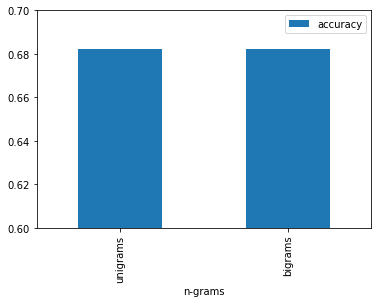

In [30]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt

accuracies = pd.DataFrame(
    [('unigrams', acc_tfidf),  ('bigrams', acc_tfidf_bigrams)], 
    columns = ['n-grams', 'accuracy']
).set_index('n-grams')
accuracies.plot.bar(ylim = (0.6, 0.7))